In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn

In [2]:
#Read CSV and Extract "Pore Limiting Diameter (PLD)" as Label
sum=pd.read_csv('1M1L3D_summary.csv')
PLD=sum['Pore Limiting Diameter']
PLD=PLD.fillna(0)
#PLD.head()

In [3]:
#Read CSV and Extract All "Metal Descriptors" as Feature 1
metals=pd.read_csv('1M1L3D_metal_descriptors.csv')
metals.drop(['refcode', 'Symbol'], axis=1, inplace=True)
metals=metals.fillna(0)
#metals.head()

In [4]:
#Feature 1 Pre-Processing with Sklearn using MinMax
from sklearn.preprocessing import MinMaxScaler
metals_scaler=MinMaxScaler()
metals_std=pd.DataFrame(metals_scaler.fit_transform(metals), columns=metals.columns, index=metals.index)
#metals_std.head()

In [5]:
#Read CSV and Extract Selected "Linker 2D Descriptors" as Feature 2
link_2D=pd.read_csv('1M1L3D_Mordred_2D_descriptors.csv', usecols=['VR2_Dzm','VR2_Dt','ETA_eta_FL','VR2_DzZ'])
link_2D=link_2D.fillna(0)
#link_2D.head()

In [6]:
#Feature 2 Pre-Processing with Sklearn using MinMax
from sklearn.preprocessing import MinMaxScaler
link_2D_scaler=MinMaxScaler()
link_2D_std=pd.DataFrame(link_2D_scaler.fit_transform(link_2D), columns=link_2D.columns, index=link_2D.index)
#link_2D_std

In [7]:
#Combining Both the Feature 1 & 2
features=pd.merge(link_2D_std, metals_std, left_index=True, right_index=True)
df=features.merge(PLD, left_index=True, right_index=True)
#df.head()

In [8]:
def apply_class(val):
  if val > 2.5:
    return 1
  else:
    return 0

In [9]:
df["Diameter_Class"]=df['Pore Limiting Diameter'].apply(apply_class)

In [10]:
#Defining Features as X and Label as Y
X=df.drop(['Pore Limiting Diameter', 'Diameter_Class'], axis=1)
Y=df["Diameter_Class"]

In [11]:
#Spliting into Training Set and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
#Logistic Regression (LR) with KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
logreg=LogisticRegression()

acc_score=[] 

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    logreg.fit(X_train, Y_train)
    Y_pred=logreg.predict(X_test)
     
    acc=accuracy_score(Y_test,Y_pred)
    acc_score.append(acc)

result_logreg=cross_val_score(logreg, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_logreg.mean()))

accuracy of each fold - [0.7013986013986014, 0.7, 0.6258741258741258, 0.6552447552447552, 0.6489510489510489, 0.6608391608391608, 0.6459062281315605, 0.6794961511546536, 0.6326102169349195, 0.689293212036389]
Avg accuracy: 0.6639613500565215


In [13]:
#Support Vector Machine (SVM) with KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
svc=SVC(C=1.0, random_state=None, kernel='linear')
 
acc_score=[]
 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    svc.fit(X_train, Y_train)
    Y_pred=svc.predict(X_test)
     
    acc=accuracy_score(Y_test,Y_pred)
    acc_score.append(acc)

result_svc=cross_val_score(svc, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_svc.mean()))

accuracy of each fold - [0.6965034965034965, 0.6986013986013986, 0.6321678321678321, 0.6594405594405595, 0.6426573426573426, 0.66993006993007, 0.642407277816655, 0.6773967809657103, 0.6326102169349195, 0.6962911126662001]
Avg accuracy: 0.6648006087684184


In [14]:
#Decision Tree (DT) with KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
clf=DecisionTreeClassifier()
 
acc_score=[]
 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    clf.fit(X_train, Y_train)
    Y_pred=clf.predict(X_test)
     
    acc=accuracy_score(Y_test,Y_pred)
    acc_score.append(acc)

result_clf=cross_val_score(clf, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_clf.mean()))

accuracy of each fold - [0.7265734265734266, 0.7482517482517482, 0.6727272727272727, 0.7230769230769231, 0.7048951048951049, 0.7181818181818181, 0.7396780965710287, 0.7193841847445767, 0.6920923722883136, 0.7263820853743876]
Avg accuracy: 0.7175431985788878


In [15]:
#Random Forest (RF) with KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
forest=RandomForestClassifier()
 
acc_score=[]
 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    forest.fit(X_train, Y_train)
    Y_pred=forest.predict(X_test)
     
    acc=accuracy_score(Y_test, Y_pred)
    acc_score.append(acc)

result_forest=cross_val_score(forest, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_forest.mean()))

accuracy of each fold - [0.7608391608391608, 0.762937062937063, 0.686013986013986, 0.7314685314685314, 0.7118881118881119, 0.7461538461538462, 0.7382785164450665, 0.7557732680195941, 0.7179846046186145, 0.7424772568229531]
Avg accuracy: 0.7372004482571313


In [16]:
#K-Nearest Neighbors (K-NN) with KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k=10
kf=KFold(n_splits=k, random_state=None)
knn=KNeighborsClassifier()
 
acc_score=[]
 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
     
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)
     
    acc=accuracy_score(Y_test, Y_pred)
    acc_score.append(acc)

result_knn=cross_val_score(knn, X, Y, cv=kf)
print('accuracy of each fold - {}'.format(acc_score))
print("Avg accuracy: {}".format(result_knn.mean()))

accuracy of each fold - [0.737062937062937, 0.7202797202797203, 0.6881118881118881, 0.6958041958041958, 0.7020979020979021, 0.7384615384615385, 0.722183344996501, 0.7319804058782365, 0.695591322603219, 0.6990902729181245]
Avg accuracy: 0.7130663528214263


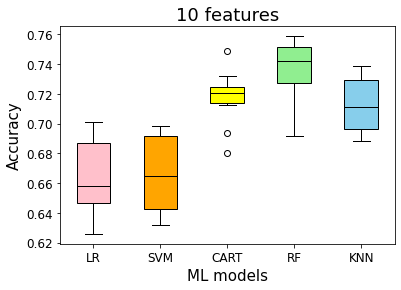

In [17]:
import matplotlib.pyplot as plt
all_results=list([result_logreg, result_svc, result_clf, result_forest, result_knn])
fig, ax=plt.subplots() 
bp=ax.boxplot(all_results, patch_artist = True)
colors = ['pink', 'orange', 'yellow', 'lightgreen', 'skyblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']: median.set(color ='black', linewidth = 1.0) 
ax.set_title('10 features', fontsize=18)
ax.set_xlabel('ML models', fontsize=15)
ax.set_ylabel('Accuracy', fontsize=15)
xticklabels=['LR','SVM', 'CART', 'RF', 'KNN']
ax.set_xticklabels(xticklabels, fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('10_Feat.png')
plt.show()